In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score


import seaborn as sns


fight_data = pd.read_csv('fight_data_cleaned.csv')

def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%Y-%m-%d')
    except ValueError:
        return pd.to_datetime(date_str, format='%m/%d/%Y')

fight_data['date'] = fight_data['date'].apply(parse_date) # Convert to datetime
fight_data.dropna(subset=['date'], inplace=True) # Drop rows with invalid dates
fight_data['year'] = fight_data['date'].dt.year
fight_data.drop(columns=['date'])
fighters = fight_data[['R_fighter', 'B_fighter', 'R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs', 'Winner']].copy()


# Define features and target
features = ['R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms', 'R_Weight_lbs', 'B_Weight_lbs']
target = ['Winner']

new_features = ['R_Height_cms', 'B_Height_cms', 'R_Reach_cms', 'B_Reach_cms']
X = fighters[new_features]
y = fighters[target]

In [10]:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def print_result(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Output the accuracies
    print(model)
    print(classification_report(y_test, y_pred))
    print("Balanced Accuracy: ", balanced_accuracy_score(y_test, y_pred))

    # Output the confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=['Red', 'Blue'])
    
def ShowFeatureImportance(X, y, model):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model = model.fit(X_train, y_train)

    hist_df = pd.DataFrame({'Feature': X.columns, 'Feature importance': model.feature_importances_})
    hist_df = hist_df.sort_values(by='Feature importance', ascending=True)
    plt.figure(figsize=(10, 4))
    plt.barh(hist_df['Feature'], hist_df['Feature importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(model)
    plt.tight_layout()
    plt.show()
    

DecisionTreeClassifier()
              precision    recall  f1-score   support

        Blue       0.42      0.49      0.45       512
         Red       0.59      0.52      0.55       712

    accuracy                           0.51      1224
   macro avg       0.50      0.50      0.50      1224
weighted avg       0.52      0.51      0.51      1224

Balanced Accuracy:  0.5045207162921348


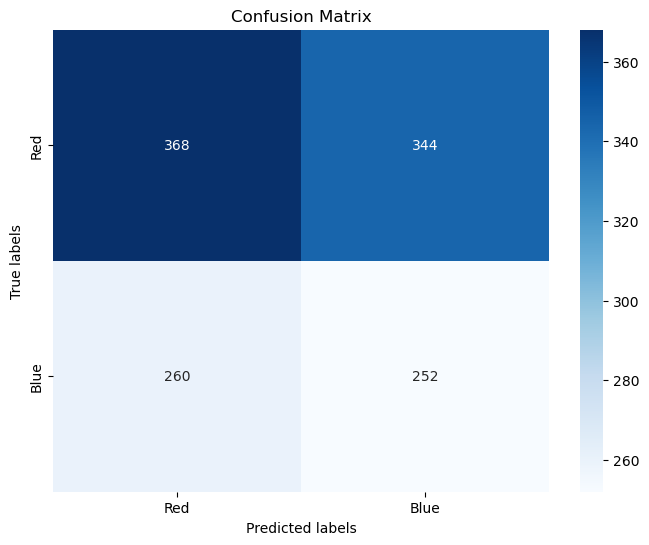

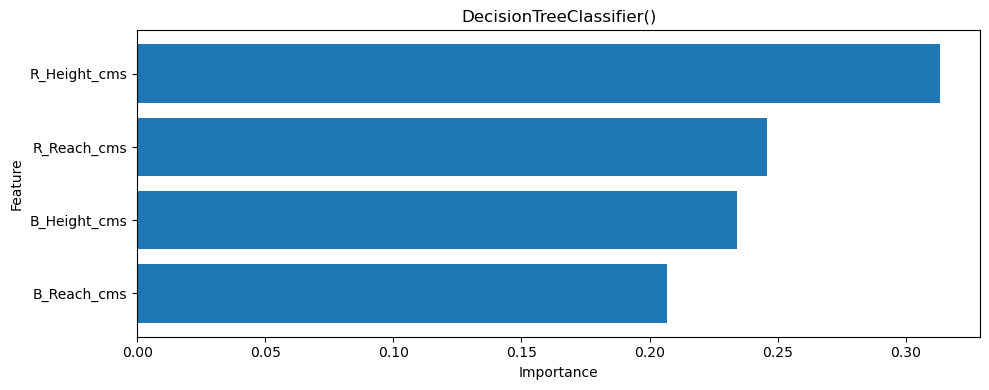

GaussianNB()
              precision    recall  f1-score   support

        Blue       0.00      0.00      0.00       498
         Red       0.59      1.00      0.74       726

    accuracy                           0.59      1224
   macro avg       0.30      0.50      0.37      1224
weighted avg       0.35      0.59      0.44      1224

Balanced Accuracy:  0.5


/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/metri

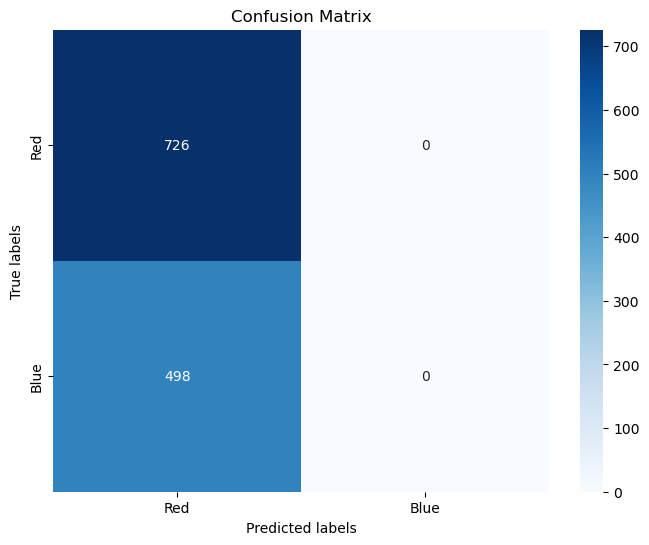

/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

        Blue       0.42      0.37      0.39       498
         Red       0.60      0.65      0.62       726

    accuracy                           0.53      1224
   macro avg       0.51      0.51      0.51      1224
weighted avg       0.53      0.53      0.53      1224

Balanced Accuracy:  0.5087457267084868


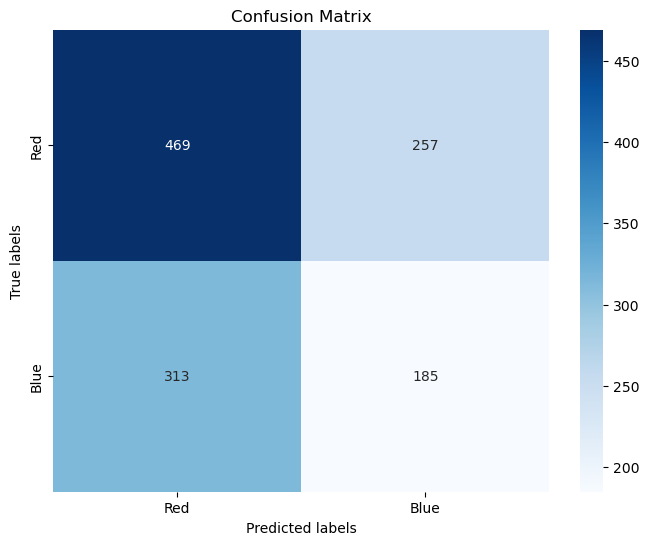

/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


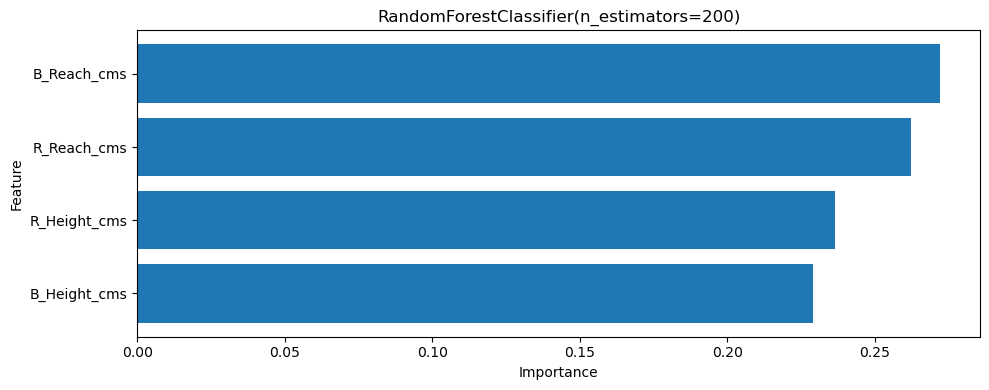

KNeighborsClassifier()
              precision    recall  f1-score   support

        Blue       0.43      0.33      0.37       526
         Red       0.57      0.67      0.62       698

    accuracy                           0.52      1224
   macro avg       0.50      0.50      0.49      1224
weighted avg       0.51      0.52      0.51      1224

Balanced Accuracy:  0.49922374628215327


/Users/jasonsun/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


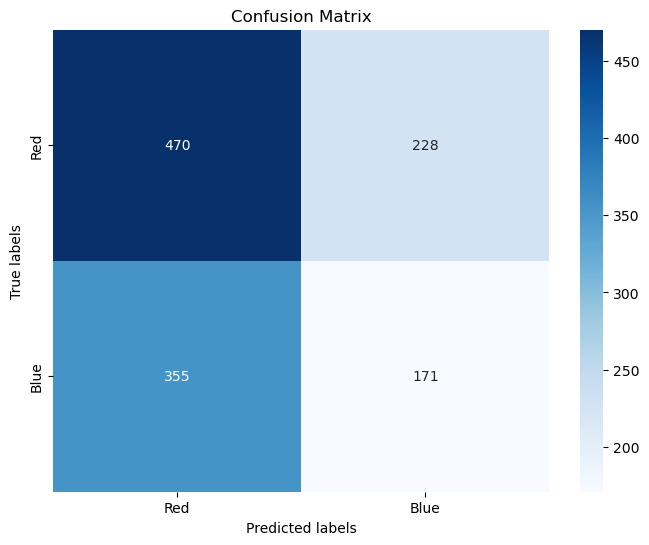

In [11]:
# DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
print_result(X, y, model_dt)
ShowFeatureImportance(X, y, model_dt)

# GaussianNB
model_nb = GaussianNB()
print_result(X, y, model_nb)

# RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200)
print_result(X, y, model_rf)
ShowFeatureImportance(X, y, model_rf)

# KNeighborsClassifier
model_knn = KNeighborsClassifier(5)
print_result(X, y, model_knn)